In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
d15 = pd.read_excel("2015 FE Guide-for DOE-Mobility Ventures only-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx")
d16 = pd.read_excel("2016 FE Guide for DOE-OK to release-no-sales-4-27-2017Mercedesforpublic.xlsx")
d17 = pd.read_excel("2017 FE Guide for DOE-release dates before 9-20-2017-no sales-9-19-2017MercedesCadillacforpublic.xlsx")

In [3]:
d18 = pd.read_excel("2018 FE Guide for DOE-release dates before 2-17-2018-no-sales-2-15-2018public.xlsx")

In [4]:
d17.shape

(1244, 162)

In [5]:
frames = [d15, d16, d17]

d_train = pd.concat(frames)

In [6]:
d_train.shape

(3701, 162)

Therefore we have 86 numerical and 76 categorical variables

In [7]:
y_train = d_train['Comb Unrd Adj FE - Conventional Fuel']

In [8]:
y_test = d18['Comb Unrd Adj FE - Conventional Fuel']

In [9]:
X_train = d_train.drop(["Comb Unrd Adj FE - Conventional Fuel"], axis=1)

In [10]:
X_train.shape

(3701, 161)

# Now we check the distribution of the output

In [11]:
#gaussian_numbers = np.random.randn(1000)
plt.hist(y_train, bins=50)
plt.title("Output mpg Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
#plt.boxplot(y_train)
fig = plt.gcf()

In [12]:
plt.boxplot(y_train)
plt.title("Output mpg Boxplot")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()

In [13]:
list(d_train)

['Model Year',
 'Mfr Name',
 'Division',
 'Carline',
 'Verify Mfr Cd',
 'Index (Model Type Index)',
 'Eng Displ',
 '# Cyl',
 'Transmission',
 'City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Comb Unrd Adj FE - Conventional Fuel',
 'Guzzler? ',
 'Air Aspir Method',
 'Air Aspiration Method Desc',
 'Trans',
 'Trans Desc',
 'Trans, Other',
 '# Gears',
 'Lockup Torque Converter',
 'Trans Creeper Gear',
 'Drive Sys',
 'Drive Desc',
 'Max Ethanol % - Gasoline',
 'Max Biodiesel %',
 'Range1 - Model Type Driving Range - Conventional Fuel',
 'Fuel Usage  - Conventional Fuel',
 'Fuel Usage Desc - Conventional Fuel',
 'Fuel Unit - Conventional Fuel',
 'Fuel Unit Desc - Conventional Fuel',
 'Gas Guzzler Exempt (Where Truck = 1975 NHTSA tr

Remove any direct measurement of the fuel economy (FE, MPG), the CO2, smog, Guzzler, and any data that has EPA in the name.

So, this page (https://www.fueleconomy.gov/feg/how_tested.shtml) explains how the FE is tested. The 4th slide explains that they measure it via tailpipe carbon emissions. That's also how they test CO2, GHG, and Smog - I think for each it's just a matter of multiplying the carbon emissions but some factor depending on fuel type. e.g. some of the conversion factors are here: https://www.epa.gov/greenvehicles/greenhouse-gas-rating. There's also an EPA page that directly says how GHG and FE ratings are therefore the same thing for regular fuel vehicles, but I can't seem to find it right now.
 

Similarly, something like annual cost isn't itself perfectly correlated with MPG, but once you account for fuel type (and thus cost per mile) it is. Same with range and tank capacity (which I can't remember if we have or not). Guzzler is just an indicator for whether they pay the gas guzzler tax, which (for non-exempt vehicle types) is just a question of whether its MPG is above or below 22.5

 

So right now my code excludes anything with 'epa', 'fe', 'mpg', 'co2', 'ghg', 'smog', 'rating', 'cost', 'range', and the 'Guzzler? ' column. This doesn't pick up anything that, to my eye, shouldn't be excluded. Some things like smog testing groups aren't leaking any target info, but also aren't useful.

 

I guess the one thing I'm unsure about is the 'rating' features. They don't give FE or GHG or whatever directly, but give a 1-10 rating based on ranges. That's still leaking target data, but maybe in an interesting (non-perfect) way that you want us to use, I don't know.

In [14]:
d_train.drop(['City FE (Guide) - Conventional Fuel',
 'Hwy FE (Guide) - Conventional Fuel',
 'Comb FE (Guide) - Conventional Fuel',
 'City Unadj FE - Conventional Fuel',
 'Hwy Unadj FE - Conventional Fuel',
 'Comb Unadj FE - Conventional Fuel',
 'City Unrd Adj FE - Conventional Fuel',
 'Hwy Unrd Adj FE - Conventional Fuel',
 'Comb Unrd Adj FE - Conventional Fuel',
 'Guzzler? ','Gas Guzzler Exempt (Where Truck = 1975 NHTSA truck definition)',
 'Gas Guzzler Exempt Desc (Where Truck = 1975 NHTSA truck definition)','EPA Calculated Annual Fuel Cost - Conventional Fuel -----  Annual fuel cost error. Please revise Verify. ',
 'City2 FE (Guide) - Alternative Fuel',
 'Hwy2 Fuel FE (Guide) - Alternative Fuel',
 'Comb2 Fuel FE (Guide) - Alternative Fuel',
 'City2 Unadj FE - Alternative Fuel',
 'Hwy2 Unadj FE - Alternative Fuel',
 'Comb2 Unadj FE - Alternative Fuel',
 'City2 Unrd Adj FE - Alternative Fuel',
 'Hwy2 Unrd Adj FE - Alternative Fuel',
 'Cmb2 Unrd Adj FE - Alternative Fuel','City CO2 Rounded Adjusted - Fuel2',
 'Hwy CO2 Rounded Adjusted - Fuel2',
 'Comb CO2 Rounded Adjusted - Fuel2',
 'Fuel2 EPA Calculated Annual Fuel Cost - Alternative Fuel','EPA FE Label Dataset ID','EPA Calculated Annual Fuel Cost',
 'EPA Calculated Gas Guzzler MPG',
 'MFR Calculated Gas Guzzler MPG ',
 'EPA Calculated Gas Guzzler Indicator (Y or N)','FE Rating (1-10 rating on Label)','#1 Smog Rating Test Group',
 '#1 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 1)',
 '#1 EPA Smog Rating (EPA Smog 1-10 Rating on Label for Test Group 1)',
 'SmartWay1 (EPA-derived SmartWay rating for Test Group 1)',
 '#2 Smog Rating Test Group',
 '#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2)',
 '#2 EPA Smog Rating (EPA Smog 1-10 Rating on Label for Test Group 2)',
 'SmartWay2 (EPA-derived SmartWay rating for Test Group 2)',
 '#3 Smog Rating Test Group',
 '#3 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 3)',
 '#3 EPA Smog Rating (EPA Smog 1-10 Rating on Label for Test Group 3)',
 'SmartWay3 (EPA-derived SmartWay rating for Test Group 3)',
 '#4 Smog Rating Test Group',
 '#4 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 4)',
 '#4 EPA Smog Rating (EPA Smog 1-10 Rating on Label for Test Group 4)',
 'SmartWay4 (EPA-derived SmartWay rating for Test Group 4)','City CO2 Rounded Adjusted',
 'Hwy CO2 Rounded Adjusted',
 'Comb CO2 Rounded Adjusted (as shown on FE Label)',
 'CO2-PHEV Composite Rounded Adjusted Combined CO2','GHG 1-10 rating on Ethanol (EPA Determined)',
                       'Unnamed: 74','Unnamed: 130',
                        'City PHEV Composite MPGe',
 'Hwy PHEV Composite MPGe',
 'Comb PHEV Composite MPGe',
                       'GHG Rating (1-10 rating on Label)',
                        '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
 '$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label) ',
                        'Annual Fuel1 Cost - Conventional Fuel',
                        'Fuel2 Annual Fuel Cost - Alternative Fuel',
                       'Range1 - Model Type Driving Range - Conventional Fuel',
                       ' Range2 - Alt Fuel Model Typ Driving Range - Alternative Fuel',
                       'PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE'], axis = 1) 
#unnamed cols are filled with NaNs removing them

,Model Year,Mfr Name,Division,Carline,Verify Mfr Cd,Index (Model Type Index),Eng Displ,# Cyl,Transmission,Air Aspir Method,...,Oil Viscosity,Stop/Start System (Engine Management System) Code,Stop/Start System (Engine Management System) Description,Model Type Desc (MFR entered),Charge Depleting Calc Appr Code (PHEV only),Charge Depleting Calc Appr Desc (PHEV only),Charge Sustaining Calc Appr Code (PHEV only),Charge Sustaining Calc Appr Desc (PHEV only),240V Charge Time at 240 volts (hours),120V Charge time at 120 Volts (hours)
0,2015,FCA Italy,Alfa Romeo,4C,FTG,264,1.8,4,Auto(AM6),TC,...,5W-30,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,ASX,8,6.0,12,Auto(AM7),NaN,...,0W40,N,No,V12 Vantage S,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,ASX,4,4.7,8,Auto(AM7),NaN,...,10W60,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,ASX,1,4.7,8,Manual(M6),NaN,...,10W60,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,ASX,5,4.7,8,Auto(AM7),NaN,...,10W60,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,ASX,2,4.7,8,Manual(M6),NaN,...,10W60,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,aston martin,Aston Martin Lagonda Ltd,Vantage GT,ASX,6,4.7,8,Auto(AM7),NaN,...,10W60,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,aston martin,Aston Martin Lagonda Ltd,Vantage GT,ASX,3,4.7,8,Manual(M6),NaN,...,10W60,N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,Volkswagen Group of,Audi,R8,VGA,27,4.2,8,Auto(AM-S7),NaN,...,"5W/30, VW50400",N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,Volkswagen Group of,Audi,R8,VGA,29,4.2,8,Manual(M6),NaN,...,"5W/30, VW50400",N,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
d_train.drop(['Mfr Name','Division','Carline','Index (Model Type Index)',
                       
                       'Air Aspiration Method Desc',
                       'Trans Desc','Trans, Other','Trans Creeper Gear','Drive Desc',
                       'Max Ethanol % - Gasoline','Max Biodiesel %', 'Fuel Usage  - Conventional Fuel',
         'Fuel Usage Desc - Conventional Fuel', 'Fuel Unit - Conventional Fuel',
         'Fuel Unit Desc - Conventional Fuel','2Dr Pass Vol',
 '2Dr Lugg Vol',
 '4Dr Pass Vol',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Htchbk Lugg Vol',' Fuel2 Usage - Alternative Fuel',
 ' Fuel2 Usage Desc - Alternative Fuel',
 'Fuel2 Unit - Alternative Fuel',
 'Fuel2 Unit Desc - Alternative Fuel',
 'Descriptor - Model Type (40 Char or less)',
 'Exhaust Valves Per Cyl','Carline Class',
 'Carline Class Desc',
 'Car/Truck Category - Cash for Clunkers Bill.',
 'Calc Approach Desc',
 'Release Date',
 'Unique Label?',
 'Label Recalc?','Relabel',
 'Relabel Desc',
 'Suppressed?',
 'Police/Emerg?',
 'Comments - Mfr Eng Cnfg','Cyl Deact?',
 'Cyl Deact Desc',
 'Var Valve Timing?',
 'Var Valve Timing Desc',
 'Var Valve Lift?',
 'Var Valve Lift Desc',
 'Energy Storage Device Desc',
 'Energy Storage Device,If Other','# Batteries',
 'Battery Type Desc',
 'Battery Type, If Other',
 'Total Voltage for Battery Pack(s)',
 'Batt Energy Capacity (Amp-hrs)',
 'Batt Specific Energy (Watt-hr/kg)',
 'Batt Charger Type Desc',
 'Comments','# Capacitors',
 'Regen Braking Type Desc',
 'Regen Braking Type, If Other',
 'Regen Braking Wheels Source (Front, Rear, Both)',
 'Driver Cntrl Regen Braking?',
 'Fuel Cell Desc',
 'Usable H2 Fill Capacity (kg)',
 'Fuel Cell Onboard H2 Capacity (kg)',
 'HEV-EV Comments','# Drive Motor Gen',
 'Motor Gen Type Desc',
 'Motor Gen Type, If Other',
 'Rated Motor Gen Power (kW)',
 'Fuel Metering Type 1 Desc',
 'Fuel Metering Type 2 Desc',
 'Fuel Metering Sys Cd',
 'Fuel Metering Sys Desc',
 'Fuel Cell Vehicle (Y or N)',
 'Off Board Charge Capable (Y or N)',
 'Camless Valvetrain (Y or N)','Oil Viscosity',
 'Stop/Start System (Engine Management System) Code',
 'Stop/Start System (Engine Management System)  Description',
 'Model Type Desc (MFR entered)',
 'Charge Depleting Calc Appr Code (PHEV only)',
 'Charge Depleting Calc Appr Desc (PHEV only)',
 'Charge Sustaining Calc Appr Code (PHEV only)',
 'Charge Sustaining Calc Appr Desc (PHEV only)',
 '240V Charge Time at 240 volts (hours)',
 '120V Charge time at 120 Volts (hours)'], axis = 1) 

,Model Year,Verify Mfr Cd,Eng Displ,# Cyl,Transmission,City FE (Guide) - Conventional Fuel,Hwy FE (Guide) - Conventional Fuel,Comb FE (Guide) - Conventional Fuel,City Unadj FE - Conventional Fuel,Hwy Unadj FE - Conventional Fuel,...,$ You Save over 5 years (amount saved in fuel costs over 5 years - on label),$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label),City CO2 Rounded Adjusted,Hwy CO2 Rounded Adjusted,Comb CO2 Rounded Adjusted (as shown on FE Label),CO2-PHEV Composite Rounded Adjusted Combined CO2,PHEV Total Driving Range (rounded to nearest 10 miles)DISTANCE,City PHEV Composite MPGe,Hwy PHEV Composite MPGe,Comb PHEV Composite MPGe
0,2015,FTG,1.8,4,Auto(AM6),24,34,28,28.7,45.7,...,750.0,NaN,365,259,317,NaN,NaN,NaN,NaN,NaN
1,2015,ASX,6.0,12,Auto(AM7),12,18,14,14.7893,25.3011,...,NaN,9250.0,742,488,628,NaN,NaN,NaN,NaN,NaN
2,2015,ASX,4.7,8,Auto(AM7),14,21,16,16.6866,28.793,...,NaN,6750.0,655,426,552,NaN,NaN,NaN,NaN,NaN
3,2015,ASX,4.7,8,Manual(M6),13,19,15,16.0147,26.5231,...,NaN,8000.0,681,461,582,NaN,NaN,NaN,NaN,NaN
4,2015,ASX,4.7,8,Auto(AM7),14,21,16,16.6866,28.793,...,NaN,6750.0,655,426,552,NaN,NaN,NaN,NaN,NaN
5,2015,ASX,4.7,8,Manual(M6),13,19,15,16.0147,26.5231,...,NaN,8000.0,681,461,582,NaN,NaN,NaN,NaN,NaN
6,2015,ASX,4.7,8,Auto(AM7),14,21,16,16.6866,28.793,...,NaN,6750.0,655,426,552,NaN,NaN,NaN,NaN,NaN
7,2015,ASX,4.7,8,Manual(M6),13,19,15,16.0147,26.5231,...,NaN,8000.0,681,461,582,NaN,NaN,NaN,NaN,NaN
8,2015,VGA,4.2,8,Auto(AM-S7),14,23,17,16.4549,29.7195,...,NaN,5750.0,656,394,538,NaN,NaN,NaN,NaN,NaN
9,2015,VGA,4.2,8,Manual(M6),11,20,14,13.6544,24.3877,...,NaN,9250.0,772,439,622,NaN,NaN,NaN,NaN,NaN


In [16]:
d_train.shape #after removing said columns

(3701, 162)

In [17]:
X_tr_temp = d_train[['Verify Mfr Cd','Air Aspir Method','Intake Valves Per Cyl','Eng Displ','# Cyl', 'Trans','# Gears','Max Ethanol % - Gasoline','Drive Sys','Fuel Usage  - Conventional Fuel']]

#28 manufacturers 'Mfr Name' - drop
#49 unique divisions models 'Division' - drop
#1153 carline (more granular) 'Carline' - could drop
#28 manufacture codes similar to mfr name 'Verify Mfr Cd' - use instead of mfr name
#'Index (Model Type Index)' index doesnt look important - drop 
#'Eng Displ' engine displacement in liters - looks like an important variable
#'# Cyl' number of cyclinders - importany variable which can explian fe
#28 unique 'Transmission' - classifies as auto vs manual and further codes available - i would strip auto vs manual rather than `
#1728 NaN values 'Air Aspir Method' - we can drop
#'Air Aspiration Method Desc' - drop
#'Trans' or 'Trans Desc' - select one - transmission style automatic/manual/semi etcm - can affect fe
#'Trans, Other' - all NaNs only - drop
#'# Gears' 8 types - important in fe
#'Lockup Torque Converter' - just Y/N variable 
#'Trans Creeper Gear' - only 2Y out of all - so drop
#'Drive Desc' - drop
#'Drive Sys' - include instead of desc

        2-Wheel Drive, Front   maps to 'R', 'A', 'F', 4, 'P', '4' - while using convert int 4 to str 4 before OHE    
        2-Wheel Drive, Rear        
        4-Wheel Drive              
        All Wheel Drive            
        Part-time 4-Wheel Drive    
#''Max Ethanol % - Gasoline','Max Biodiesel %', 'Fuel Usage  - Conventional Fuel',
         'Fuel Usage Desc - Conventional Fuel', 'Fuel Unit - Conventional Fuel',
         'Fuel Unit Desc - Conventional Fuel' - drop all
         
#'2Dr Pass Vol',
 '2Dr Lugg Vol',
 '4Dr Pass Vol',
 '4Dr Lugg Vol',
 'Htchbk Pass Vol',
 'Htchbk Lugg Vol' - all these are NaNs - drop them
 
#' Fuel2 Usage - Alternative Fuel',
 ' Fuel2 Usage Desc - Alternative Fuel',
 'Fuel2 Unit - Alternative Fuel',
 'Fuel2 Unit Desc - Alternative Fuel',
 'Descriptor - Model Type (40 Char or less)' - NaNs majority or not useful for prediction - drop them
 
#'Intake Valves Per Cyl',
 'Exhaust Valves Per Cyl' - skewed towards 2 - can drop them
 
#'Carline Class',
 'Carline Class Desc',
 'Car/Truck Category - Cash for Clunkers Bill.',
 'Calc Approach Desc',
 'Release Date',
 'Unique Label?',
 'Label Recalc?' - seems not useful - drop them
 
#'Relabel',
 'Relabel Desc',
 'Suppressed?',
 'Police/Emerg?',
 'Comments - Mfr Eng Cnfg', - drop them
 
#'Cyl Deact?',
 'Cyl Deact Desc',
 'Var Valve Timing?',
 'Var Valve Timing Desc',
 'Var Valve Lift?',
 'Var Valve Lift Desc',
 'Energy Storage Device Desc',
 'Energy Storage Device,If Other', - drop them
 
#'# Batteries',
 'Battery Type Desc',
 'Battery Type, If Other',
 'Total Voltage for Battery Pack(s)',
 'Batt Energy Capacity (Amp-hrs)',
 'Batt Specific Energy (Watt-hr/kg)',
 'Batt Charger Type Desc',
 'Comments', - drop them
 
#'# Capacitors',
 'Regen Braking Type Desc',
 'Regen Braking Type, If Other',
 'Regen Braking Wheels Source (Front, Rear, Both)',
 'Driver Cntrl Regen Braking?',
 'Fuel Cell Desc',
 'Usable H2 Fill Capacity (kg)',
 'Fuel Cell Onboard H2 Capacity (kg)',
 'HEV-EV Comments', - drop them
 
#'# Drive Motor Gen',
 'Motor Gen Type Desc',
 'Motor Gen Type, If Other',
 'Rated Motor Gen Power (kW)',
 'Fuel Metering Type 1 Desc',
 'Fuel Metering Type 2 Desc',
 'Fuel Metering Sys Cd',
 'Fuel Metering Sys Desc',
 'Fuel Cell Vehicle (Y or N)',
 'Off Board Charge Capable (Y or N)',
 'Camless Valvetrain (Y or N)', - drop them
 
#'Oil Viscosity',
 'Stop/Start System (Engine Management System) Code',
 'Stop/Start System (Engine Management System)  Description',
 'Model Type Desc (MFR entered)',
 'Charge Depleting Calc Appr Code (PHEV only)',
 'Charge Depleting Calc Appr Desc (PHEV only)',
 'Charge Sustaining Calc Appr Code (PHEV only)',
 'Charge Sustaining Calc Appr Desc (PHEV only)',
 '240V Charge Time at 240 volts (hours)',
 '120V Charge time at 120 Volts (hours)' - drop them

In [18]:
d_train.groupby('Max Ethanol % - Gasoline')['Verify Mfr Cd'].nunique()
#d_train['Max Ethanol % - Gasoline'].unique()

Max Ethanol % - Gasoline
10.0    25
15.0     7
85.0     8
Name: Verify Mfr Cd, dtype: int64

In [19]:
# Nan_ct = d_train[['# Batteries',
#  'Battery Type Desc',
#  'Battery Type, If Other',
#  'Total Voltage for Battery Pack(s)',
#  'Batt Energy Capacity (Amp-hrs)',
#  'Batt Specific Energy (Watt-hr/kg)',
#  'Batt Charger Type Desc',
#  'Comments',]].isnull().sum()
# Nan_ct

In [20]:
d_train['Intake Valves Per Cyl'].describe()

count    3701.000000
mean        1.921102
std         0.269615
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Intake Valves Per Cyl, dtype: float64

In [21]:
X_tr_temp.head()

,Verify Mfr Cd,Air Aspir Method,Intake Valves Per Cyl,Eng Displ,# Cyl,Trans,# Gears,Max Ethanol % - Gasoline,Drive Sys,Fuel Usage - Conventional Fuel
0,FTG,TC,2,1.8,4,AM,6,10.0,R,GP
1,ASX,NaN,2,6.0,12,AM,7,10.0,R,GP
2,ASX,NaN,2,4.7,8,AM,7,10.0,R,GP
3,ASX,NaN,2,4.7,8,M,6,10.0,R,GP
4,ASX,NaN,2,4.7,8,AM,7,10.0,R,GP


In [22]:
#Finding number of numerical categories
num_cols = X_tr_temp._get_numeric_data().columns
X_tr_temp[num_cols]

,Intake Valves Per Cyl,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline
0,2,1.8,4,6,10.0
1,2,6.0,12,7,10.0
2,2,4.7,8,7,10.0
3,2,4.7,8,6,10.0
4,2,4.7,8,7,10.0
5,2,4.7,8,6,10.0
6,2,4.7,8,7,10.0
7,2,4.7,8,6,10.0
8,2,4.2,8,7,15.0
9,2,4.2,8,6,15.0


#### 45 number columns and 64 categorical columns

In [23]:
X_tr_temp[num_cols].corr()

,Intake Valves Per Cyl,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline
Intake Valves Per Cyl,1.000000,-0.529882,-0.341157,-0.047476,-0.162042
Eng Displ,-0.529882,1.000000,0.926291,0.271426,0.121207
# Cyl,-0.341157,0.926291,1.000000,0.305227,0.069625
# Gears,-0.047476,0.271426,0.305227,1.000000,0.018139
Max Ethanol % - Gasoline,-0.162042,0.121207,0.069625,0.018139,1.000000


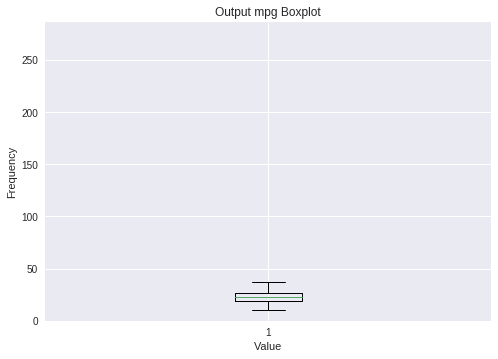

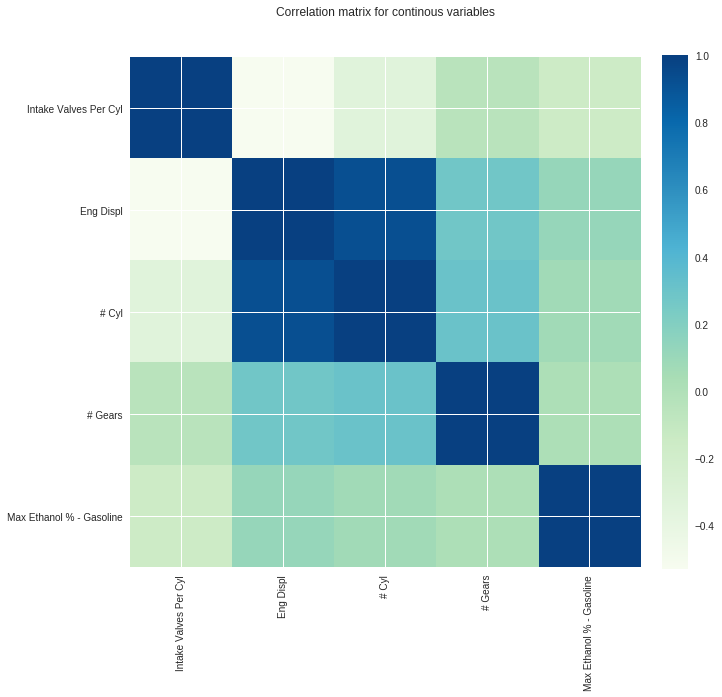

In [24]:
plt.matshow(X_tr_temp[num_cols].corr(), cmap='GnBu')
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.gca()
ax.set_xticklabels(num_cols, rotation = 'vertical')
ax.set_xticks(np.arange(len(num_cols)))
ax.title.set_position([.5, 1.07]) #this adjusts title position. tune 1.07 
ax.set_yticklabels(num_cols)
ax.set_yticks(np.arange(len(num_cols)))
plt.title('Correlation matrix for continous variables')
plt.colorbar(fraction=0.046, pad=0.04) 
ax.xaxis.set_ticks_position('bottom') 
plt.show()

In [25]:
#remove cylinder as it is highly correlated with Eng Displ. 
X_tr_temp = X_tr_temp.drop(['# Cyl'],axis=1)

In [26]:
X_tr_temp.isnull().sum() #only max ethanol col has NaNs

Verify Mfr Cd                         0
Air Aspir Method                   1973
Intake Valves Per Cyl                 0
Eng Displ                             0
Trans                                 0
# Gears                               0
Max Ethanol % - Gasoline             80
Drive Sys                             0
Fuel Usage  - Conventional Fuel       0
dtype: int64

In [27]:
X_tr_temp.shape

(3701, 9)

In [28]:
X_tr_temp['y1'] = y_train

In [29]:
X_tr = X_tr_temp.dropna()

In [30]:
X_tr.shape

(1649, 10)

In [31]:
X_tr.head()

,Verify Mfr Cd,Air Aspir Method,Intake Valves Per Cyl,Eng Displ,Trans,# Gears,Max Ethanol % - Gasoline,Drive Sys,Fuel Usage - Conventional Fuel,y1
0,FTG,TC,2,1.8,AM,6,10.0,R,GP,27.9406
16,VGA,TC,2,2.0,AMS,6,15.0,A,GP,25.6242
17,VGA,TC,2,4.0,SA,8,15.0,A,GP,16.5500
18,BMX,TC,2,2.0,SA,8,10.0,R,GP,25.9308
19,BMX,TC,2,2.0,M,6,10.0,R,GP,26.4148


In [37]:
X_tr_dummied = pd.get_dummies(X_tr, prefix = ['mfr','in_valve','trans','gear','ethanol','drive','fuel_usage', 'air'],
                      columns = ['Verify Mfr Cd','Intake Valves Per Cyl','Trans','# Gears',
                                 'Max Ethanol % - Gasoline','Drive Sys','Fuel Usage  - Conventional Fuel', 'Air Aspir Method'])
X_tr_dummied.head()

,Eng Displ,y1,mfr_ASX,mfr_BMX,mfr_CRX,mfr_FEX,mfr_FJX,mfr_FMX,mfr_FTG,mfr_GMX,...,drive_A,drive_F,drive_P,drive_R,fuel_usage_G,fuel_usage_GP,fuel_usage_GPR,air_SC,air_TC,air_TS
0,1.8,27.9406,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
16,2.0,25.6242,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
17,4.0,16.5500,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
18,2.0,25.9308,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
19,2.0,26.4148,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [38]:
y_test.shape

(413,)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
y_train = X_tr_dummied['y1']

X_tr_temp2 = X_tr_dummied.drop(["y1"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_tr_temp2, y_train, random_state=0)

scaler = StandardScaler()


scaler.fit(X_train['Eng Displ'])

X_tr_sc = X_train.copy(deep = True)
X_te_sc = X_test.copy(deep = True)

#scaler.fit(X_tr_dummied[])

X_tr_sc['Eng Displ'] = scaler.transform(X_train['Eng Displ'])
X_te_sc['Eng Displ'] = scaler.transform(X_test['Eng Displ'])


/home/adi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/adi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/adi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

In [40]:
X_tr_sc

,Eng Displ,mfr_ASX,mfr_BMX,mfr_CRX,mfr_FEX,mfr_FJX,mfr_FMX,mfr_FTG,mfr_GMX,mfr_HNX,...,drive_A,drive_F,drive_P,drive_R,fuel_usage_G,fuel_usage_GP,fuel_usage_GPR,air_SC,air_TC,air_TS
63,-1.523044,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1005,-0.661353,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1173,2.472071,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
724,0.122003,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
14,2.628742,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
989,-1.131366,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1000,-0.661353,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
514,-1.053031,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
469,0.592017,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
405,-0.661353,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [41]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=5)
rr.fit(X_tr_sc,y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
rr.score(X_te_sc,y_test)

0.81713647118159249